### Линейная алгебра. Лабораторная работа 1, зима 2023, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [1]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [3]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [3]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [4]:
#создаём нулевую матрицу  Z  размера  3×4
Z = np.zeros((3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
#создаём диагональную матрицу  5×5  с диагональными элементами 1, 2, 3, 4 и 5
diag_matrix = np.diag([1, 2, 3, 4, 5])
print(diag_matrix)



[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [6]:
#находим её след
trace = np.trace(diag_matrix)
print(trace)

15


In [7]:
#ищем обратную
inverse_matrix = sla.inv(diag_matrix)
print(inverse_matrix)

#print(diag_matrix.dot(inverse_matrix))

[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [8]:
#генерируем случайную матрицу X  размера 4×5
X = np.random.rand(4, 5)
print(X)

[[0.1522521  0.770045   0.32269935 0.21115701 0.28992257]
 [0.79486733 0.75121121 0.92097582 0.90163167 0.07859166]
 [0.0740682  0.88459212 0.86377928 0.68278372 0.09042342]
 [0.77999126 0.9712766  0.09689776 0.6413246  0.80003498]]


In [9]:
#ищем определитель подматрицы матрицы  X , расположенной на пересечении 2 и 3 строки и 1 и 2 столбца
slice_matrix = X[1:3, 0:2]
#print(slice_matrix)
print(sla.det(slice_matrix))

0.6474925090617664


In [10]:
#ищем произведение  транспонированной на Х
XTX = X.T.dot(X)
print(XTX)

[[1.26886723 1.53746162 0.92074323 1.2996268  0.73732905]
 [1.53746162 2.88316903 1.79854725 2.06680489 1.13933546]
 [0.92074323 1.79854725 1.70783515 1.55043854 0.32156632]
 [1.2996268  2.06680489 1.55043854 1.7350178  0.70690166]
 [0.73732905 1.13933546 0.32156632 0.70690166 0.73846411]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [7]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    n = len(X)
    if len(X[0, :]) != n:
        raise ValueError ('different dimensions')
    det = 1.
    for k in range(n):
        if X[k, k] == 0:
            for i in range(k + 1, n):
                if X[i, k] != 0:
                    X[[i, k]] = X[[k, i]]
                    det *= -1
                    break
                if i == n - 1:
                    return 0
        for i in range(k + 1, n):
            coeff = X[i, k] / X[k, k]
            if coeff != 0:
                    for j in range(k, n):
                        X[i, j] = X[i, j] - X[k, j] * coeff
    for i in range (n):
        det *= X[i, i]

    return det

Простая проверка:

In [167]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [168]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

7.44 µs ± 198 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
16.4 µs ± 304 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.89 ms ± 758 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
54.5 ms ± 5.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
23.5 ms ± 3.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


C:\Users\linic\AppData\Local\Temp\ipykernel_8608\119809695.py:31: RuntimeWarning: overflow encountered in scalar multiply
  det *= X[i, i]


1min 45s ± 4.27 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


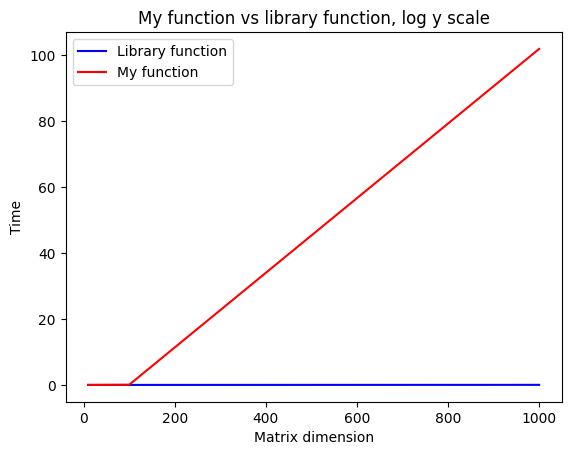

In [169]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

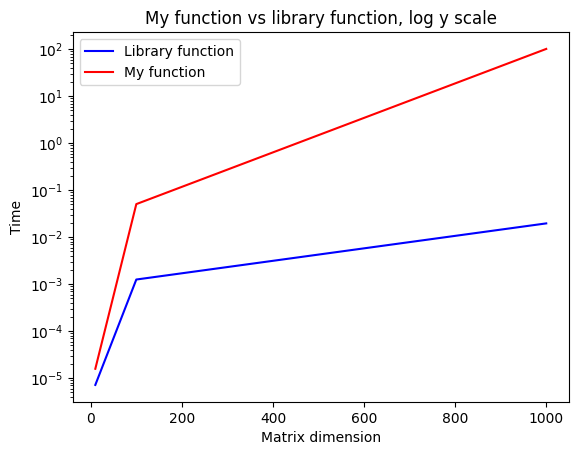

In [170]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [7]:
A = np.array([[1, 0], [10 ** 20, 1]])
B = np.array([[10 ** -20, 1], [0, 1-10**20]])
print(A.dot(B))
A_1 = np.array([[1., 0.], [10. ** 20, 1.]])
B_1 = np.array([[10.** -20, 1.], [0., 1.-10.**20]])
print(A_1.dot(B_1))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
\begin{pmatrix}
    1e-20 & 1 \\
    1.0 & 1
  \end{pmatrix}
  
другой ответ неверный, так как в ячейке [1, 1] должно стоять значение $10^{20} + 1 - 10^{20} = 1$

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [19]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    for i in range(dim):
        P[0, i] = 1
        P[i, 0] = 1
    for i in range(1, dim):
        for j in range(1, dim):
            P[i, j] = P[i - 1, j] + P[i, j - 1]

    return P

#print(my_pascal(4))

Чему равен её определитель? Обязательно объясните свой ответ.

----
Имеем матрицу Паскаля размера ${(n + 1)}\cdot{(n + 1)}$
\begin{bmatrix}
   C_0^0 & C_1^0 & C_2^0 & \cdots & C_n^0 \\
   C_1^1 & C_2^1 & C_3^1 & \cdots & C_{n + 1}^1 \\
   C_2^2 & C_3^2 & C_4^2 & \cdots & C_{n + 2}^2 \\
   \vdots  & \vdots &\vdots & \ddots & \vdots  \\
   C_{n - 1}^{n - 1} & C_{n}^{n - 1} & C_{n + 1}^{n-1} & \cdots & C_{2n - 1}^{n - 1} \\  
   C_n^n & C_{n+1}^n & C_{n + 2} ^ n & \cdots & C_{2n}^n  
\end{bmatrix}

Приведём её к ступенчатому виду. Будем вычитать строчки друг из друга, сначала последнюю из предпоследней, потому предпоследнюю из третьей снизу и так далее. Из соотношений $C_i^j = C_{i - 1}^{j} + C_{i - 1}^{j - 1}$ и $C_i^i = C_{i-1}^{i-1} = 1$ получается, что все $C_i^j$, которые не в первой строчке (то есть для которых $i > 0$) сдвигаются на один вправо):

\begin{bmatrix}
   C_0^0 & C_1^0 & C_2^0 & \cdots & C_n^0 \\
   0 & C_1^1 & C_2^1 & \cdots & C_{n}^1 \\
   0 & C_2^2 & C_3^2 & \cdots & C_{n + 1}^2 \\
   \vdots  & \vdots &\vdots & \ddots & \vdots  \\
   0 & C_{n - 1}^{n - 1} & C_{n}^{n - 1} & \cdots & C_{2n - 2}^{n - 1} \\  
   0 & C_n^n & C_{n+1}^n & \cdots & C_{2n - 1}^n  
\end{bmatrix}

Сделаем то же самое, но на одну итерацию меньше -- не будем вычитать первую строчку из нулевой. Тогда у нас занулится второй столбец нижнего треугольника и во всех строчках с $i >= 2$ $С_i^j$ сдвинутся вправо.

\begin{bmatrix}
   C_0^0 & C_1^0 & C_2^0 & \cdots & C_n^0 \\
   0 & C_1^1 & C_2^1 & \cdots & C_{n}^1 \\
   0 & 0 & C_2^2 & \cdots & C_{n}^2 \\
   \vdots  & \vdots &\vdots & \ddots & \vdots  \\
   0 & 0 & C_{n - 1}^{n - 1} & \cdots & C_{2n - 3}^{n - 1} \\  
   0 & 0 & C_n^n & \cdots & C_{2n - 2}^n  
\end{bmatrix}

Проделаем аналогичное до тех пор, пока не занулится весь нижний треугольник (каждый раз проводим на одно вычитание меньше). В конце концов на диагонали будут элементы, которые изначально были первыми в строках:

\begin{bmatrix}
   C_0^0 & C_1^0 & C_2^0 & \cdots & C_n^0 \\
   0 & C_1^1 & C_2^1 & \cdots & C_{n}^1 \\
   0 & 0 & C_2^2 & \cdots & C_{n}^2 \\
   \vdots  & \vdots &\vdots & \ddots & \vdots  \\
   0 & 0 & 0 & \cdots & C_{n}^{n - 1} \\  
   0 & 0 & 0 & \cdots & C_{n}^n  
\end{bmatrix}

Это верхнетреугольная матрица, её определитель равен произведению диагональных элементов. Все диагональные элементы равны $C_i^i = 1$. То есть её определитель равен $1$. Мы только вычитали строки друг из друга, а при таком элементарном преобразовании определитель не меняется, то есть определитель исходной матрицы тоже равен 1.
Ответ: 1

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [17]:
sla.det(my_pascal(30))

-2.0461148872042093e+48

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

Не забудьте написать тесты, которые будут проверять корректность ваших функций.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [44]:
def prod_and_sq_sum(A):
    n = len(A)
    if len(A[0, :]) != n:
        raise ValueError ('different dimensions')
    diag = np.diagonal(A)
    prod_ = np.prod(diag)
    sq_sum = np.sum(diag**2)
    return(prod_, sq_sum)

In [45]:
#считаем в лоб
def prod_and_sq_sum_with_cycle(A):
    n = len(A)
    if len(A[0, :]) != n:
        raise ValueError ('different dimensions')
    prod_ = 1
    sq_sum = 0
    for i in range(n):
        prod_ *= A[i, i]
        sq_sum += A[i, i] ** 2
    return(prod_, sq_sum)

In [46]:
#проверяем, совпадает ли библиотечное решение с лобовым
for _ in range(10):
    X = np.random.rand(8,8)
    prod_, sq_sum = prod_and_sq_sum(X)
    my_prod, my_sq_sum = prod_and_sq_sum_with_cycle(X)
    if np.abs(prod_ - my_prod) > 1e-6 or np.abs(sq_sum - my_sq_sum) > 1e-6:
        print('FAILED')
    else:
        print('ok')
#X = np.random.rand(8, 7)
#a = prod_and_sq_sum(X) #действительно выбрасывает ValueError

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}a_ib_i^T$$

In [75]:
def f(A, B, k):
    n = len(A[0, :])
    a = A[:, 0:min(n, k)]
    b = B[:, 0:min(n, k)]
    ans = a.dot(b.T)
    return ans

In [76]:
#считаем в лоб
def f_for(A, B, k):
    m = len(A)
    ans = np.zeros((m, m))
    for i in range(min(len(A[0, :]), k)):
        ans += A[:, i:i+1].dot(B[:, i:i+1].T)
    return ans

In [77]:
#проверяем, совпадает ли библиотечное решение с лобовым
import random
for _ in range(10):
    size1 = random.randint(1, 10)
    size2 = random.randint(1, 10)
    k = random.randint(1, 10)
    A = np.random.rand(size1, size2)
    B = np.random.rand(size1, size2)
    ans1 = f(A, B, k)
    ans2 = f_for(A, B, k)
    for i in range(len(ans1)):
        for j in range(len(ans1)):
            if np.abs(ans1[i, j] - ans2[i, j]) > 1e-6:
                print('FAILED')

**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [81]:
def get_diag(A, B):
    diagonal = np.sum(A * B.T, axis=1) #не вычисляем целиком
    return diagonal

In [82]:
#в лоб считаем
def get_diag_my(A, B):
    C = A.dot(B)
    ans = np.zeros(len(C))
    for i in range(len(C)):
        ans[i] = C[i, i]
    return ans

In [83]:
#проверяем, совпадает ли библиотечное решение с лобовым
for _ in range(10):
    A = np.random.rand(8,8)
    B = np.random.rand(8,8)
    ans1 = get_diag(A, B)
    ans2 = get_diag_my(A, B)
    for i in range(len(ans1)):
        if np.abs(ans1[i] - ans2[i]) > 1e-6:
            print('FAILED')

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

Ваша функция должна работать для любой точки корректно.

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка). Ваша функция должна работать для любой точки корректно.

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)). Ваша функция должна работать для любой точки корректно

In [3]:
import cmath
import math

def shrink_rotate(x, a, coef=1., angle=0.):
    return(a + (x - a) * cmath.rect(coef, angle))
    raise NotImplementedError()

def shrink_rotate_conj(x, a, coef=1., angle=0.):
    return a + cmath.conjugate(((x - a) * cmath.rect(coef, angle)))
    raise NotImplementedError()

def geometric_inverse(x, a, r):
    distance = abs(x - a)
    if distance == 0:
        return math.inf
    x_inverse = a + (r**2 / distance) * (x - a)
    return x_inverse
    raise NotImplementedError()
    
#print(geometric_inverse(1. + 0.1 * j, 0 + 0. * 1j, 1)) 
#print(shrink_rotate(0. + 2. * 1j, 0. + 1. * 1j, 2, math.pi/2))


**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

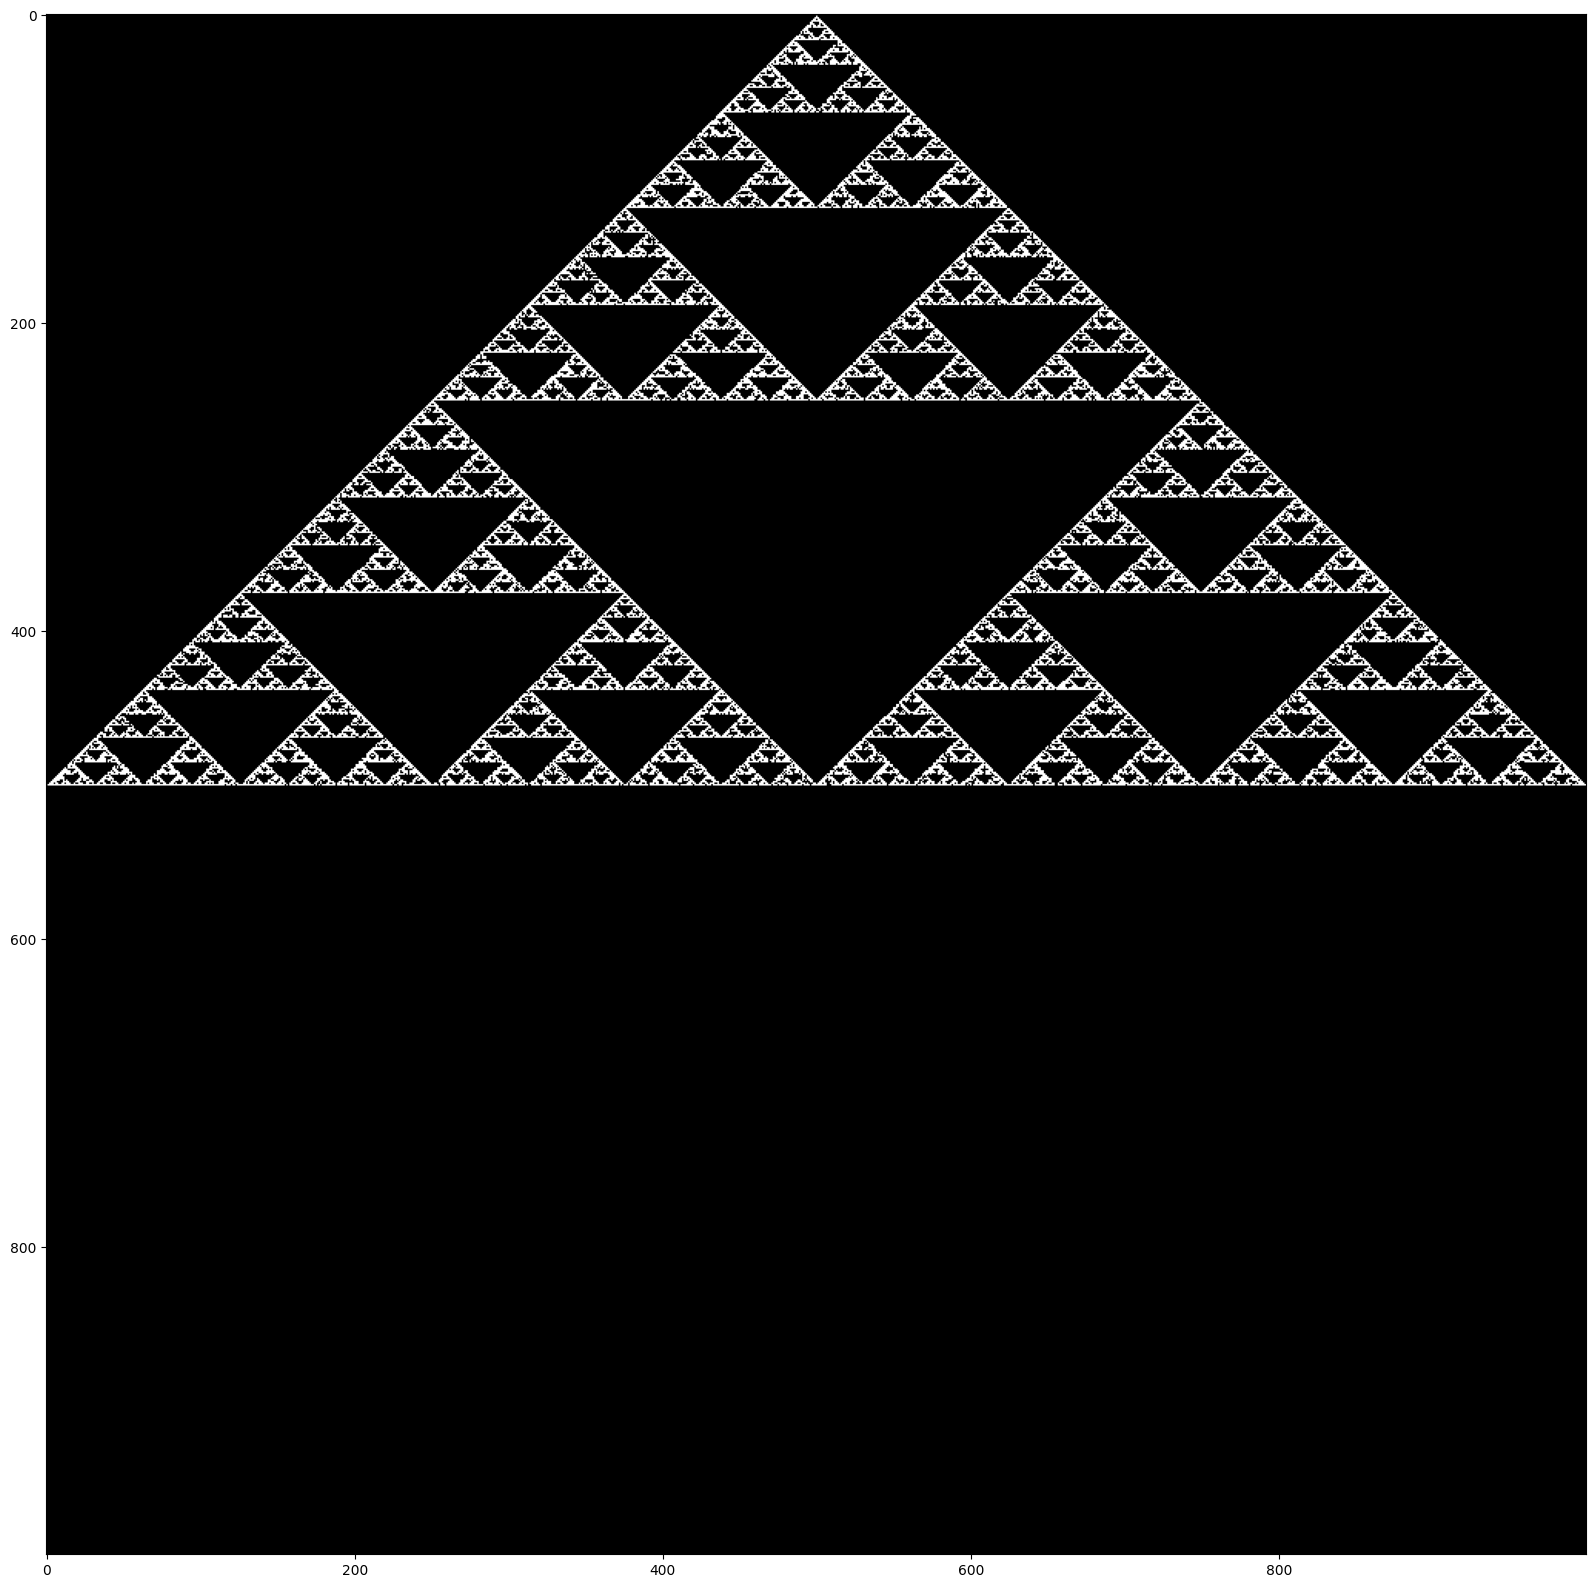

In [113]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

matrix = np.zeros((1000, 1000))

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter > 8:
        matrix[500 - int(z.imag * 500), 500 + int(z.real * 500)] = 1

plt.figure(figsize=(20, 20))
plt.imshow(matrix, cmap='gray')

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
Заметим, что треугольник Серпинского, который у нас получился, является самоподобной фигурой. Если посмотреть на верхний треугольник, на правый нижний, на левый нижний и увеличить их в два раза (гомотетия от соответствующей вершины с коэффициентом $0.5$, то будет в точности исходный треугольник. Какие преобразования мы делаем: пусть исходный треугольник $ABC$, тогда мы берем точку и делаем гомотетию с коэффициентом $0.5$ к случайной вершине из $A, B, C$. Наша исходная точка находится на нижней стороне полученного треугольника и делит её в отношении $3:1$. Пусть мы находимся в какой-то точке треугольника Серпинского. Докажем, что гомотетия с центром в любой вершине и коэффициентом $0.5$ оставляет нашу точку в белой области (если нарисовать настоящий треугольник, то мы действительно будем всегда попадать в его точки. Ну вот мы находимся в какой-то белой точке. Делаем гомотетию с коэффициентом $0.5$, попадаем в аналогичную точку треугольника, прилегающего к соответствующей вершине (так как при гомотетии большой треугольник переходит в треугольник в два раза меньшего размера, прилегающий к вершине. То есть попадаем в точку, получающуюся из исходной гомотетией, а ровно такие точки есть в треугольнике Серпинского. Значит, наш процесс никогда не выходит из картинки, попадаем только в точки треугольника Серпинского. Ну и благодаря случайности посетим примерно все точки (примерно близко ко всем точкам). 

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

Нарисовала несколько, какие понравились <3


***Кривой квадратик***

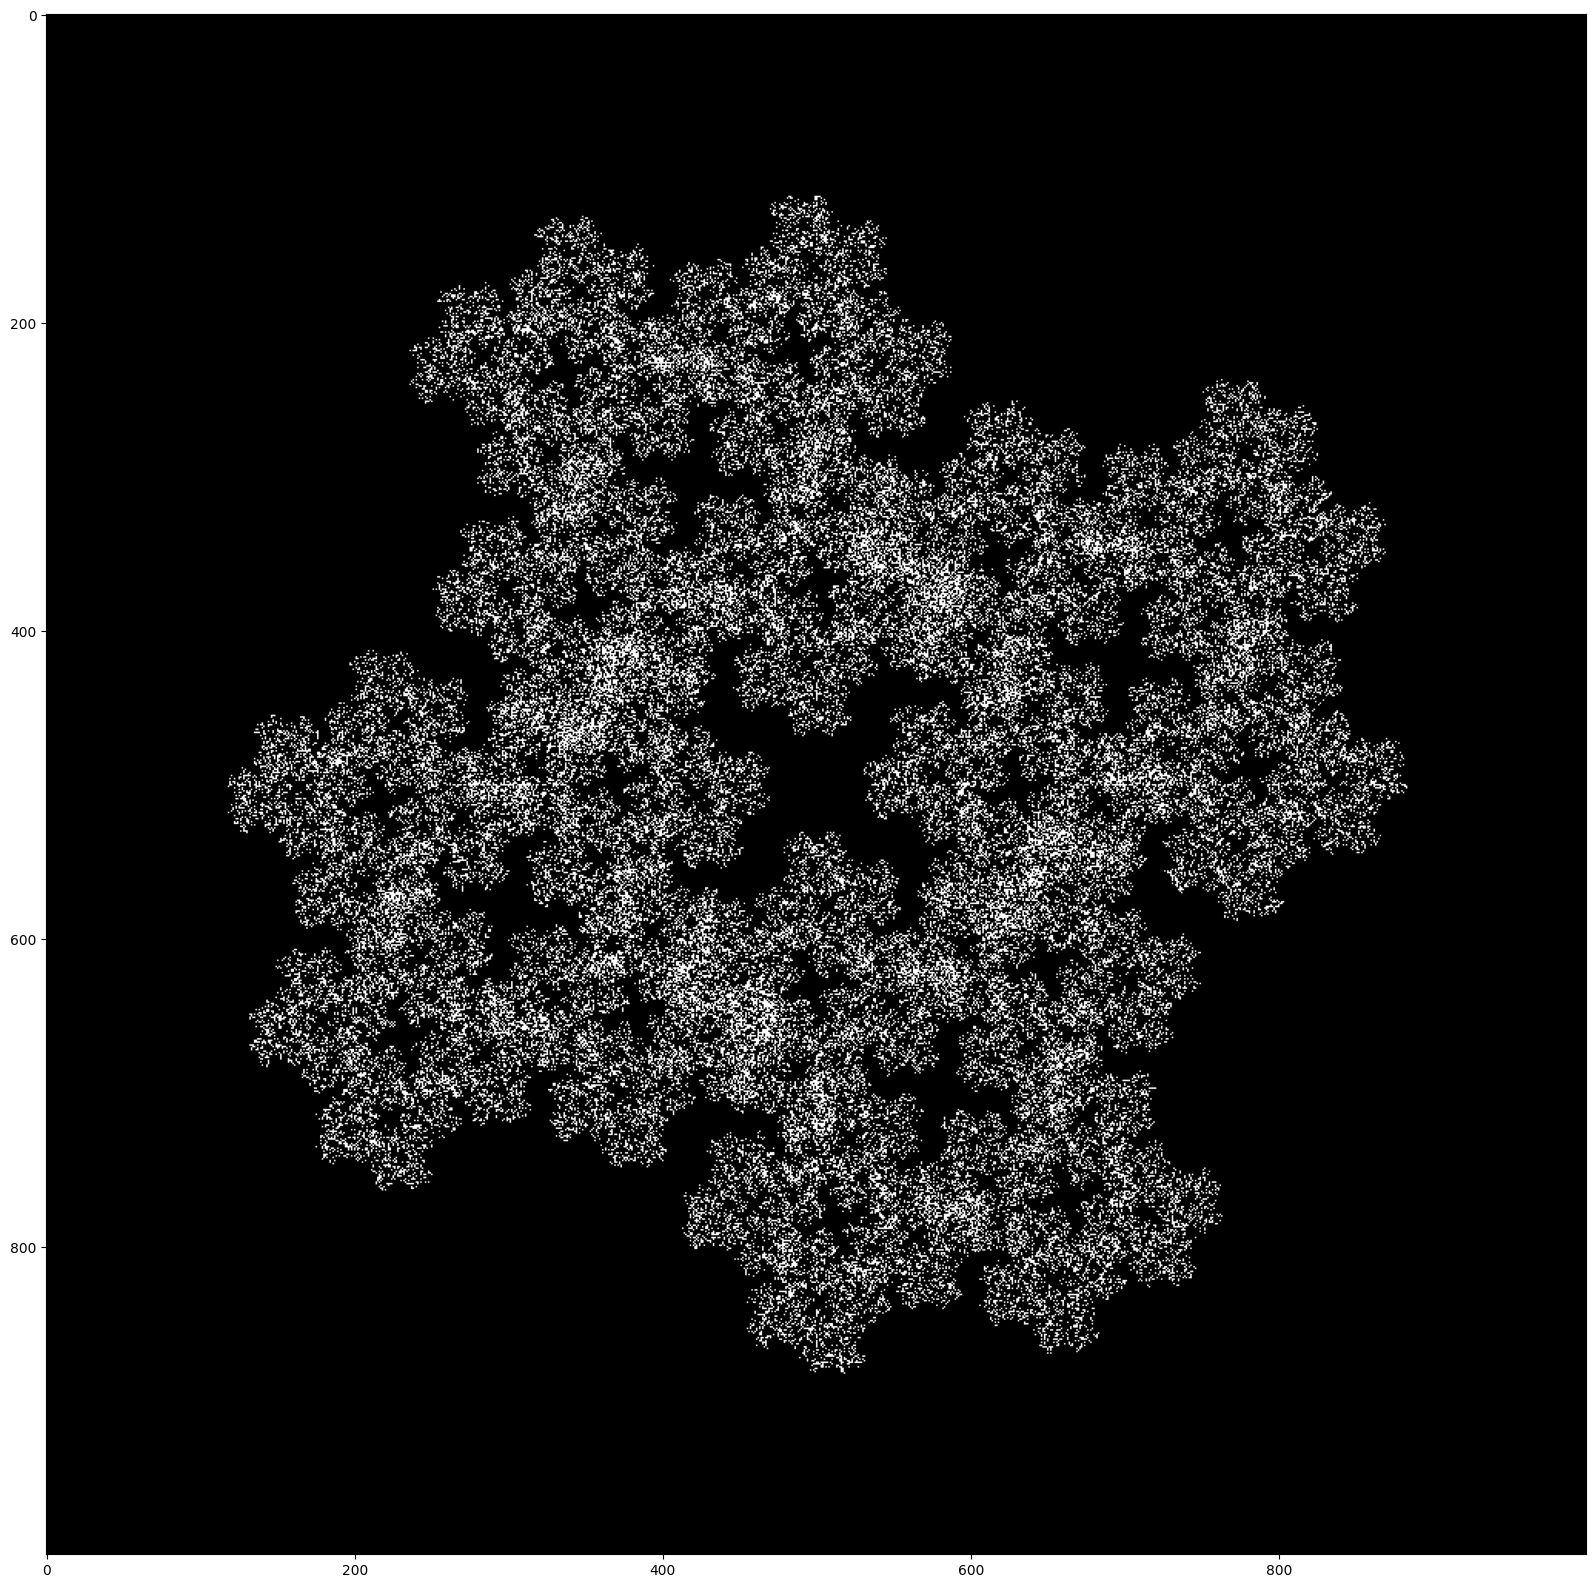

In [162]:
z = 0. - 0*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0.5 + 0.5*1j, coef=0.5, angle=0.5)),
    (lambda t: shrink_rotate(t, 0.5 - 0.5*1j, coef=0.5, angle=0.5)),
    (lambda t: shrink_rotate(t, - 0.5 + 0.5*1j, coef=0.5, angle=0.5)),
    (lambda t: shrink_rotate(t, - 0.5 - 0.5*1j, coef=0.5, angle=0.5))
]

matrix = np.zeros((1000, 1000))

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter > 8:
        matrix[500 - int(z.imag * 500), 500 + int(z.real * 500)] = 1

plt.figure(figsize=(20, 20))
plt.imshow(matrix, cmap='gray')

***снежинка***


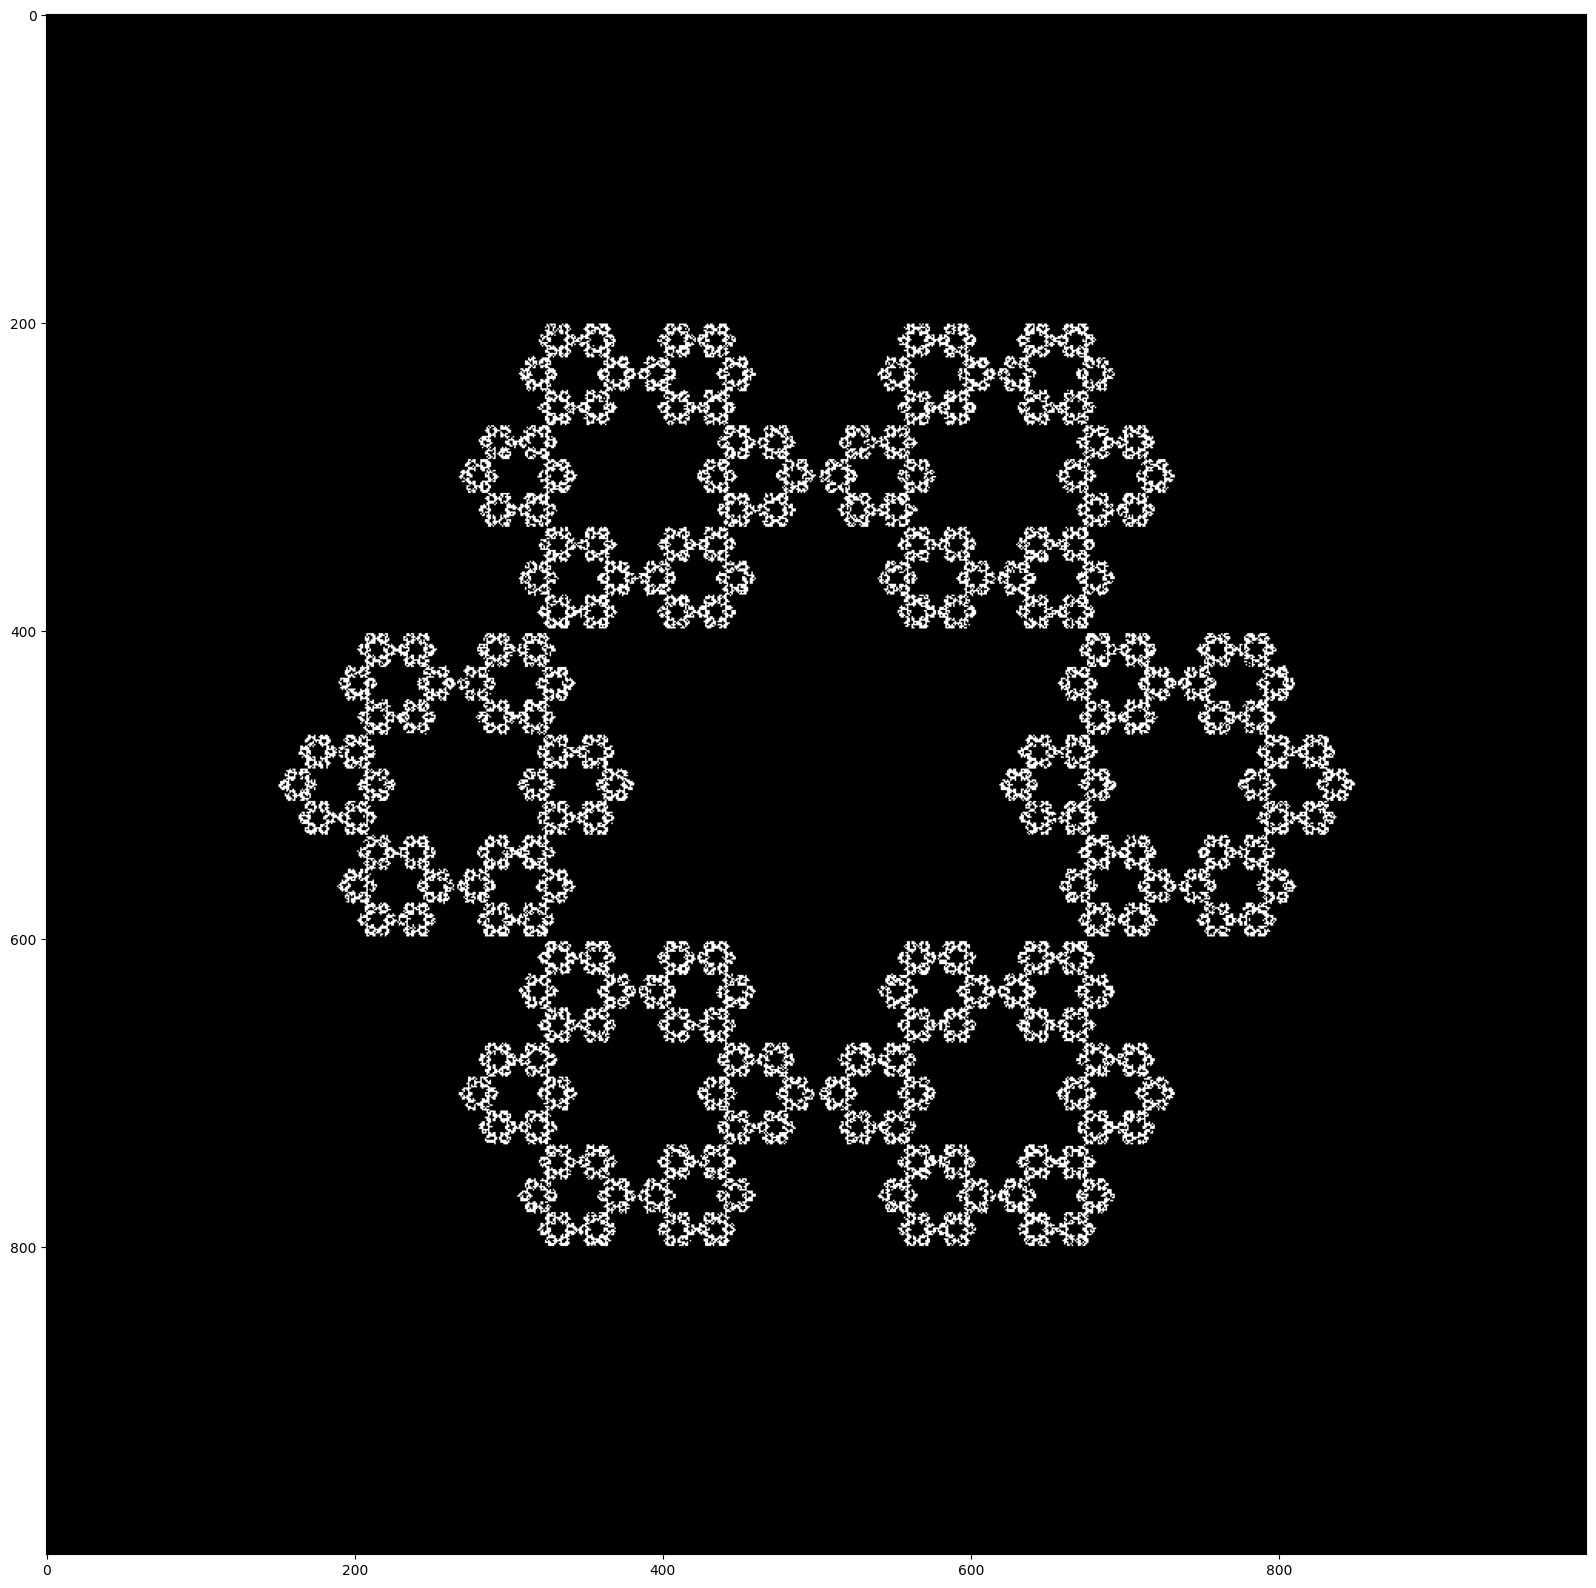

In [6]:
z = 0. - 0*1j
max_iter = 100000
angle1 = 0.0
coeff = 0.33 #(0.35 тоже красиво)
funcs = [
    (lambda t: shrink_rotate(t, 0.35 + 0.6*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, -0.35 + 0.6*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, -0.7 + 0.*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, 0.7 + 0.*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, -0.35 - 0.6*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, 0.35 - 0.6*1j, coef=coeff, angle=angle1))
]

matrix = np.zeros((1000, 1000))

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter > 8:
        matrix[500 - int(z.imag * 500), 500 + int(z.real * 500)] = 1

plt.figure(figsize=(20, 20))
plt.imshow(matrix, cmap='gray')

***случайно написала одну точку дважды, вот такое забавное приведение получилось***


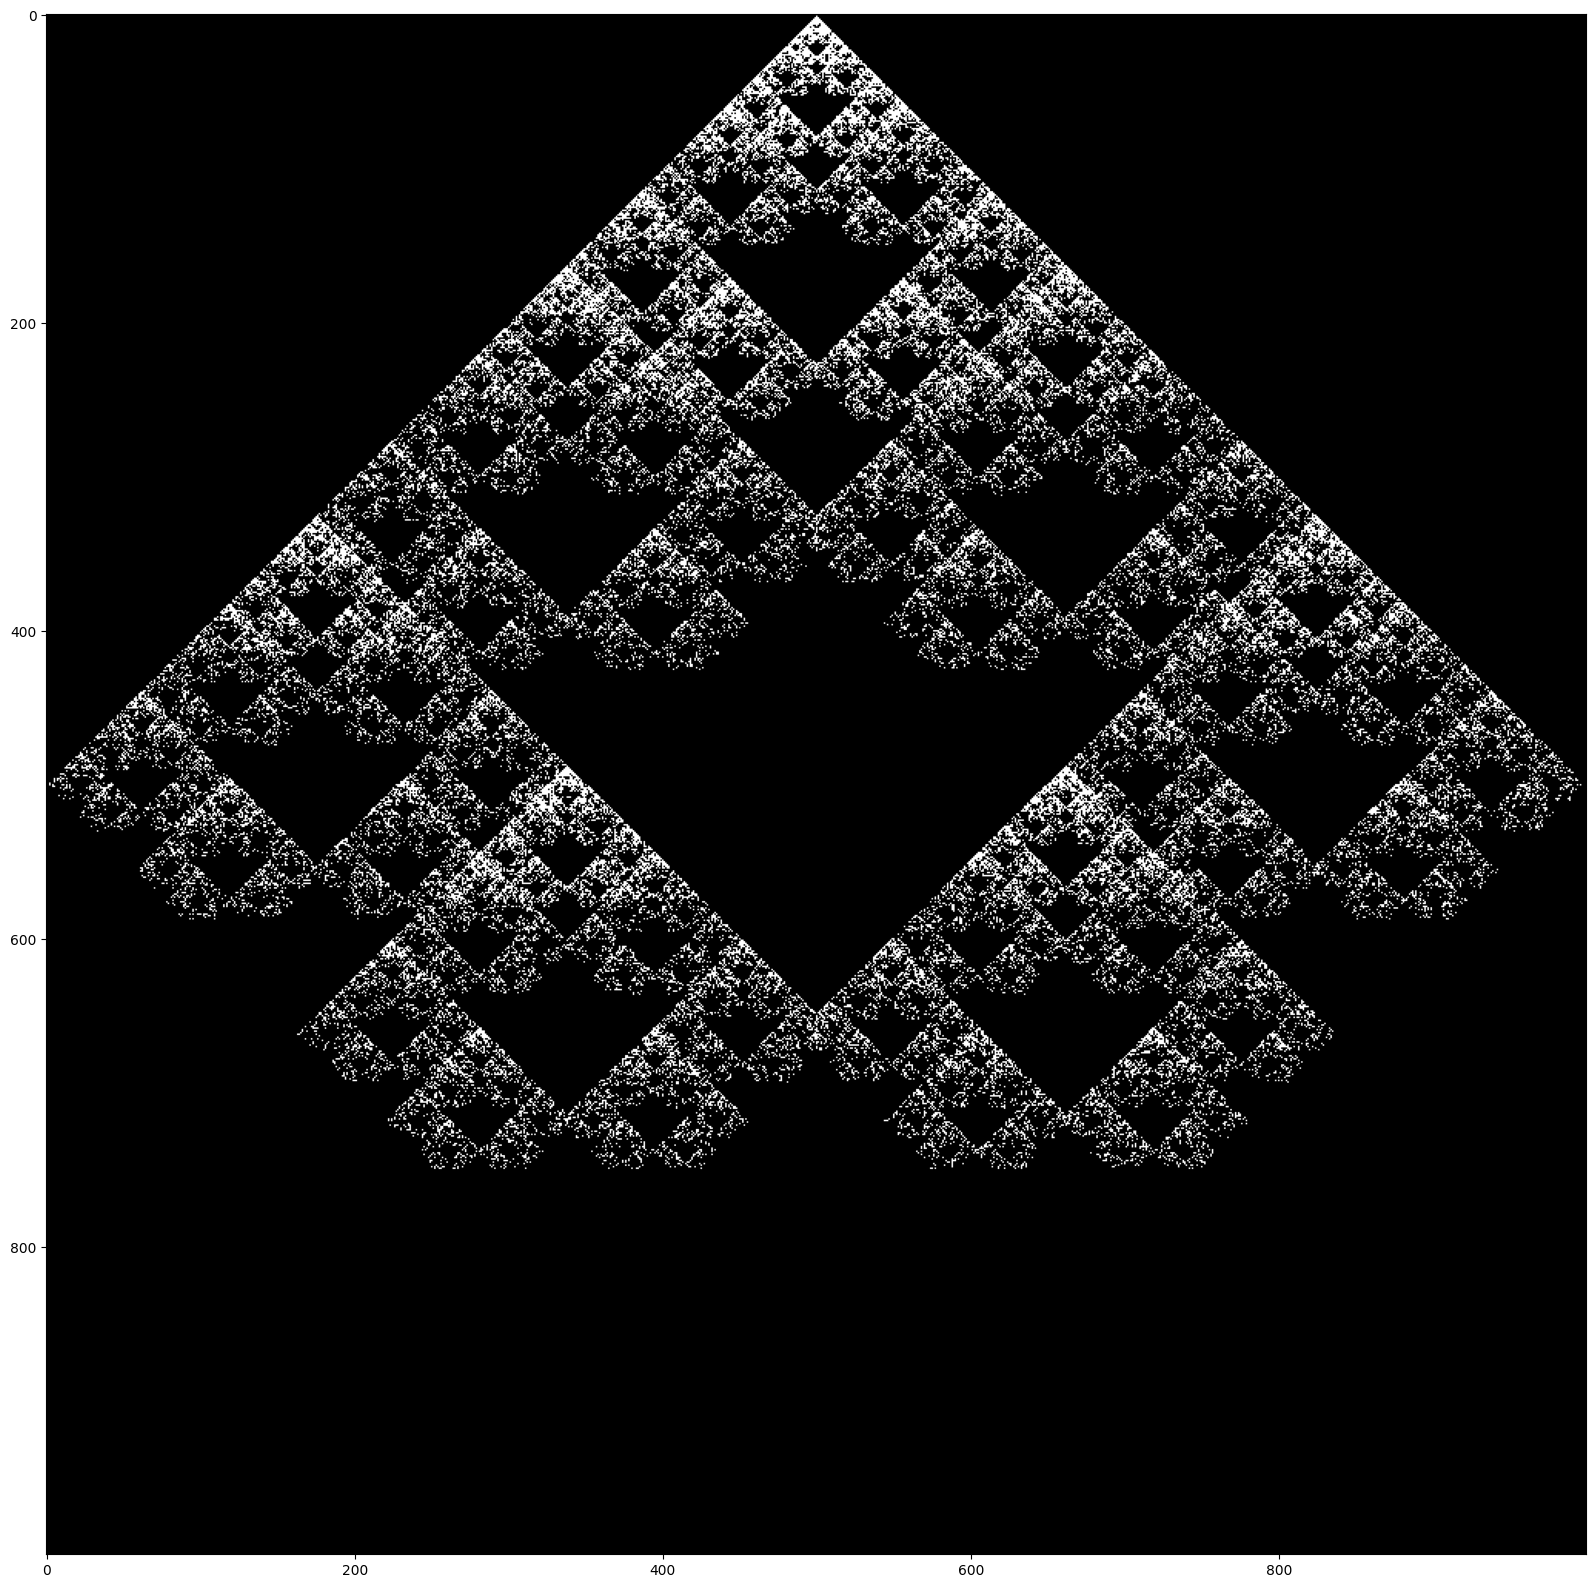

In [163]:
z = 0. - 0*1j
max_iter = 100000
angle1 = 0.0
coeff = 0.35
funcs = [
    (lambda t: shrink_rotate(t, 1 + 0.*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, 0 + 1.*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, -1 + 0.*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, -0.5 - 0.5*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, 0.5 - 0.5*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, -0.5 + 0.5*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, 0.5 + 0.5*1j, coef=coeff, angle=angle1))
]

matrix = np.zeros((1000, 1000))

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter > 8:
        matrix[500 - int(z.imag * 500), 500 + int(z.real * 500)] = 1

plt.figure(figsize=(20, 20))
plt.imshow(matrix, cmap='gray')

***нормальный предыдущий = скатерть***

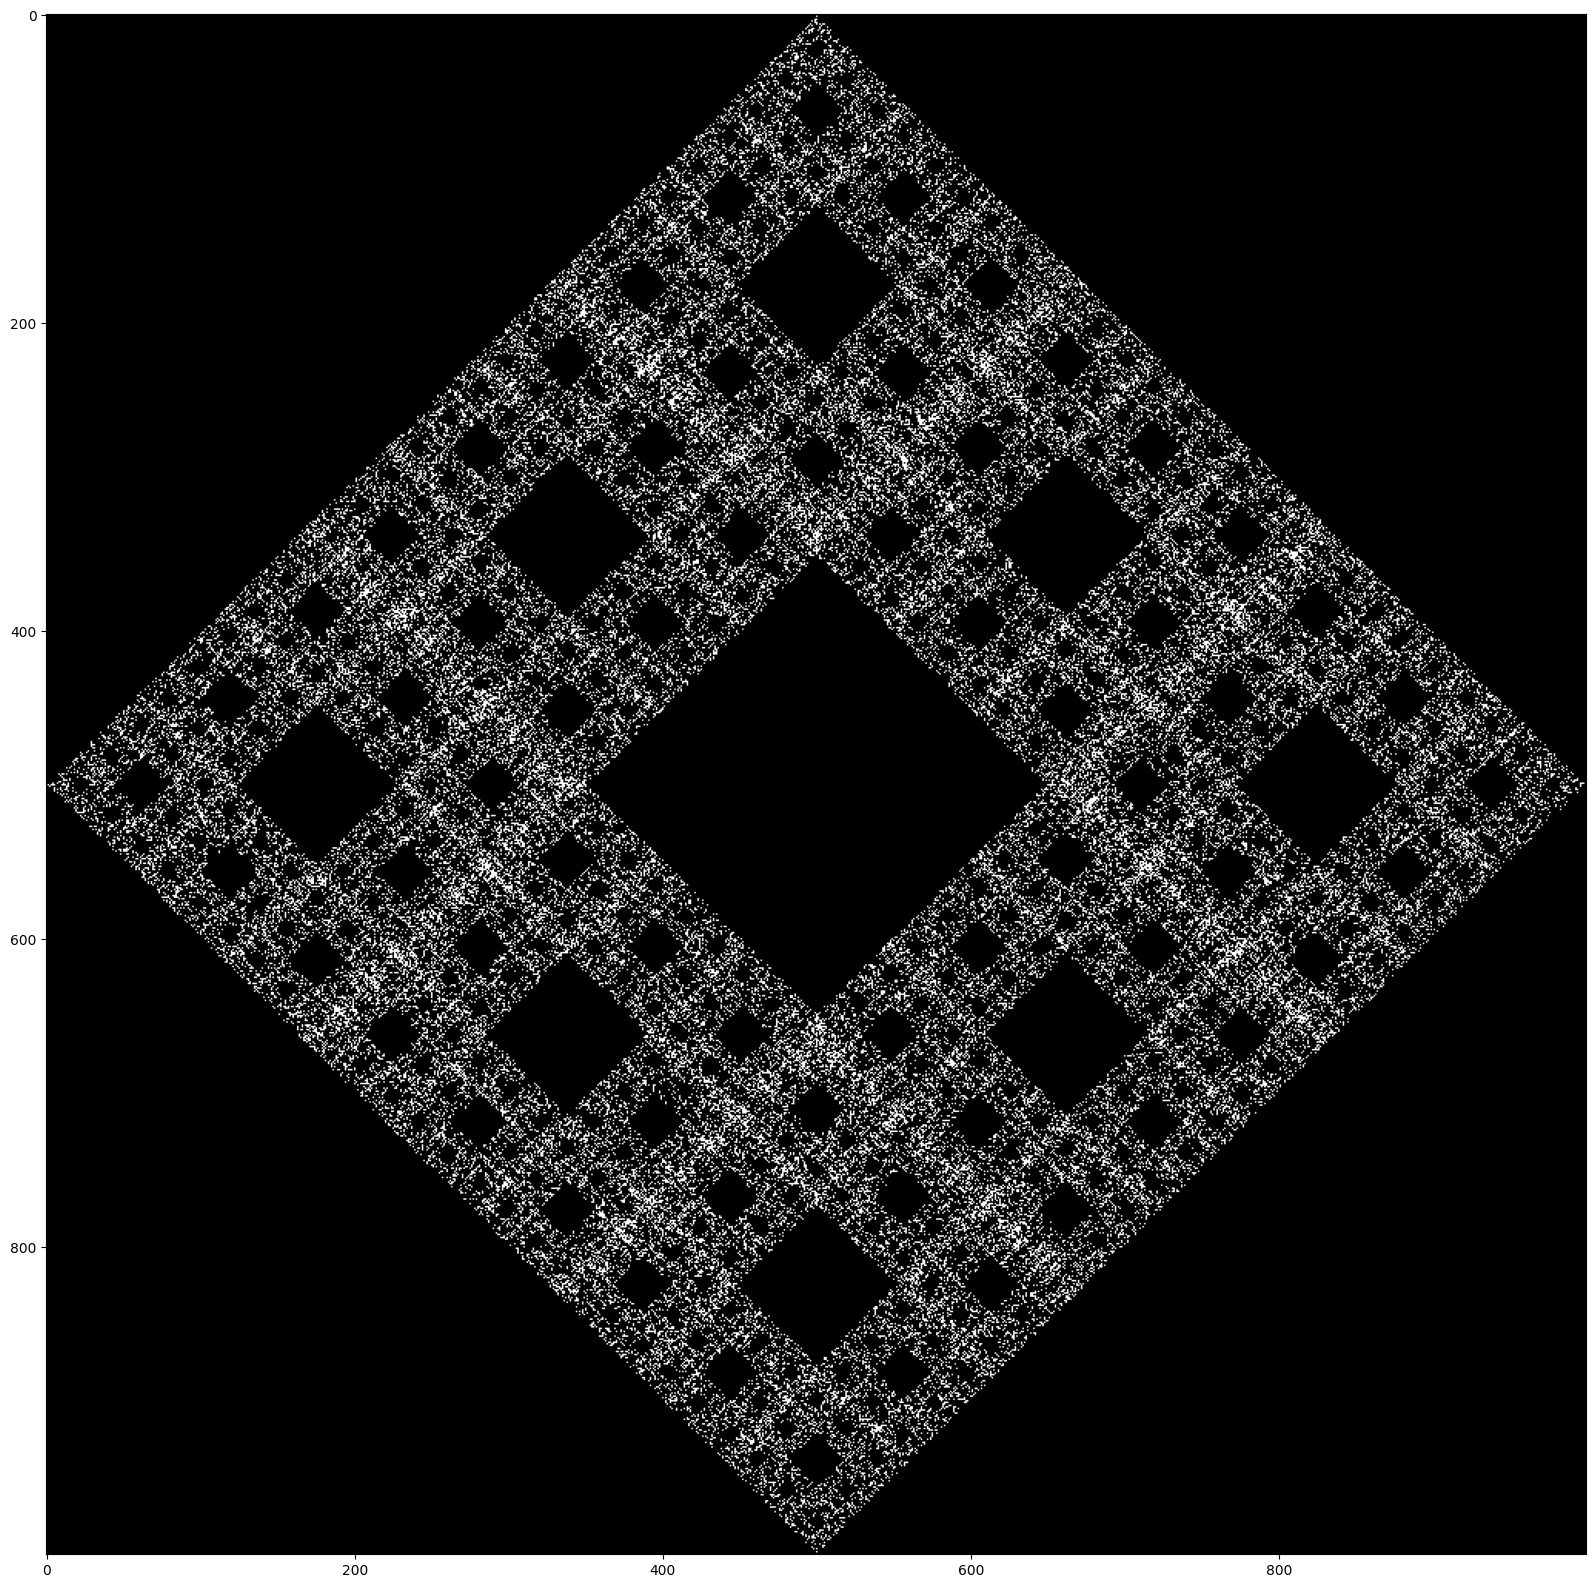

In [164]:
z = 0. - 0*1j
max_iter = 100000
angle1 = 0.0
coeff = 0.35
funcs = [
    (lambda t: shrink_rotate(t, 1 + 0.*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, 0 - 1.*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, -1 + 0.*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, -0.5 - 0.5*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, 0.5 - 0.5*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, -0.5 + 0.5*1j, coef=coeff, angle=angle1)),
    (lambda t: shrink_rotate(t, 0.5 + 0.5*1j, coef=coeff, angle=angle1))
]

matrix = np.zeros((1000, 1000))

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter > 8:
        matrix[500 - int(z.imag * 500), 500 + int(z.real * 500)] = 1

plt.figure(figsize=(20, 20))
plt.imshow(matrix, cmap='gray')

## Часть 6. Функции от матриц

### Пусть $A$ -- некоторая квадратная матрица. В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать с помощью разложения в ряд, но мы пойдем другим путем. В этой задаче мы продемонстрируем другой метод:

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 231:

`A = np.array([[-1,1,2,-2],[-5,4,3,-4],[0,0,2,-1],[1,0,-1,1]])`

- у группы 232:

`A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])`

- у группы 233:

`A = np.array([[6,-3,-5,-3],[-7,4,6,4],[9,-3,-6,-5],[-3,-2,0,2]])`

- у группы 234:

`A = np.array([[-6,-4,3,6],[1,-3,0,-1],[-1,-1,-5,0],[1,1,1,-4]])`



Посчитайте указанным способом:


1) $B = e^A$.

2) $S = \sin A$.

3) $T = \cos A$.

4) Проверьте равенство $S^2 + T^2 = E$, то есть $\sin^2 A + \cos^2 A = E$.

5) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

Заметим, что для взятия производных и нахождения корней многочлена не обязательно использовать программы.

In [3]:
#считаем хар многочлен для матрицы А (он, как известно, является зануляющим)
import sympy as sp

x = sp.symbols('x')
A = sp.Matrix([[6,-3,-5,-3],[-7,4,6,4],[9,-3,-6,-5],[-3,-2,0,2]])

# Вычисление характеристического многочлена
char_poly = A.charpoly(x)
print(char_poly)

PurePoly(x**4 - 6*x**3 + 13*x**2 - 12*x + 4, x, domain='ZZ')


Заметим (вольфрам альфа), что $x^4 - 6x^3 + 13x^2 - 12x + 4 = (x - 1) ^ 2 (x - 2) ^ 2$, то есть корням нашего $f(x)$ являются $1$ и $2$, каждый кратности $2$
Мы ищем многочлен $g(x)$ степени $3$ (так как его степень строго меньше, чем степень $f(x)$, а лучше взять побольше, если что, занулятся старшие коэффициенты). Пусть это многочлен $ax^3 + bx^2 + cx + d$. Тогда, поскольку мы рассматриваем производные строго до кратности корней, нас интересуют $g(1)$, $g'(1)$, $g(2)$, $g'(2)$ $\\$
$g(1) = a + b + c + d$,

$g'(1) = 3a + 2b + c$,

$g(2) = 8a + 4b + 2c + d$,

$g'(2) = 12a + 4b + c$.

Пусть теперь у нас есть гладкая функция $\phi(x)$. Тогда, чтобы найти $g(x)$, нам надо решить систему $Gx = F$, где
$G$ = 

\begin{bmatrix}
    1 & 1 & 1 & 1\\
    3 & 2 & 1 & 0\\
    8 & 4 & 2 & 1\\
    12 & 4 & 1 & 0\\
  \end{bmatrix} 
  
  -- мы просто записали коэффициенты при $a, b, c, d$. а $F$ - столбец из $\phi(1)$, $\phi'(1)$, $\phi(2)$, $\phi'(2)$.

In [46]:
import math

G = np.array([[1, 1, 1, 1], [3, 2, 1, 0], [8, 4, 2, 1], [12, 4, 1, 0]])
A = np.array([[6,-3,-5,-3],[-7,4,6,4],[9,-3,-6,-5],[-3,-2,0,2]])
A_2 = A.dot(A)
A_3 = A_2.dot(A)
E = np.eye(4)

***1) $B = e^A$.***

$\phi(x) = e ^ x$. Тогда $\phi(1) = e ^ 1, \phi'(1) = e ^ 1, \phi(2) = e ^ 2, \phi'(2) = e ^ 2$

In [47]:
F_B = np.array([math.e, math.e, math.e**2, math.e**2])
coefs_B = sla.solve(G, F_B)
print(coefs_B)

[ 0.76578939 -1.1106651   2.64224388  0.42091367]


***ОТВЕТ***

In [48]:
B = coefs_B[0] * (A_3) + coefs_B[1] * (A_2) + coefs_B[2] * A + coefs_B[3] * E
print(B)

[[ 38.89777294 -15.54390158 -32.27450622 -19.44888647]
 [-50.95760331  20.98046524  42.38184415  26.83794257]
 [ 65.7357155  -20.98046524 -49.77090025 -34.22699867]
 [-17.49639403  -2.71828183   7.3890561   10.10733793]]


***2) $S = sin(A)$.***

$\phi(x) = sin(x)$. Тогда $\phi(1) = math.sin(1), \phi'(1) = math.cos(1), \phi(2) = math.sin(2), \phi'(2) = math.cos(2)$

In [49]:
F_S = np.array([math.sin(1), math.cos(1), math.sin(2), math.cos(2)])
coefs_S = sla.solve(G, F_S)
print(coefs_S)

[-0.01149741 -0.4264862   1.42776696 -0.14831236]


***ОТВЕТ***

In [50]:
S = coefs_S[0] * (A_3) + coefs_S[1] * (A_2) + coefs_S[2] * A + coefs_S[3] * E
print(S)

[[-1.22776578 -0.1804845   1.12428504  0.76446723]
 [ 2.90153044  0.5379822  -2.02440516 -1.18061407]
 [-3.73382411  0.78746206  3.76599626  1.5967609 ]
 [ 0.29199137 -1.56457789 -1.44042242  0.42532415]]


**3) $T = cos(A)$.**

$\phi(x) = cos(x)$. Тогда $\phi(1) = math.cos(1), \phi'(1) = -math.sin(1), \phi(2) = math.cos(2), \phi'(2) = -math.sin(2)$

In [51]:
F_T = np.array([math.cos(1), -math.sin(1), math.cos(2), -math.sin(2)])
coefs_T = sla.solve(G, F_T)
print(coefs_T)

[ 0.16212987 -0.76349765  0.1991347   0.94253539]


***ОТВЕТ***

In [52]:
T = coefs_T[0] * (A_3) + coefs_T[1] * (A_2) + coefs_T[2] * A + coefs_T[3] * E
print(T)

[[-4.1683147   2.54508768  4.47866069  2.775044  ]
 [ 6.52721186 -1.95763366 -5.3408064  -3.68434142]
 [-8.34580671  2.45078425  6.74325442  4.59363885]
 [ 2.66006584  1.73009369 -0.02067473 -0.36899512]]


***4)Проверяем равенство  $S^2 + T^2 = E$***

In [53]:
E_ = S.dot(S) + T.dot(T)
for i in range(4):
    for j in range(4):
        if np.abs(E_[i, j] - E[i, j]) > 1e-6:
            print('FAILED') #всё хорошо, в пределах погрешности Е_ равна Е
print(E_)

[[ 1.00000000e+00 -9.71445147e-16 -8.88178420e-16 -1.33226763e-14]
 [-5.32907052e-15  1.00000000e+00 -1.64313008e-14  5.77315973e-15]
 [ 1.77635684e-15  3.77475828e-15  1.00000000e+00 -4.88498131e-15]
 [-6.55031585e-15 -1.77635684e-15  0.00000000e+00  1.00000000e+00]]


**5) $L = ln(B)$.**

Надо заново разобратья с хар многочленом, так как теперь у нас другая матрица, $B$ вместо $A$

In [54]:
roots = np.linalg.eigvals(B)
print(roots)

[7.38905674+0.00000000e+00j 7.38905546+0.00000000e+00j
 2.71828183+2.14309709e-07j 2.71828183-2.14309709e-07j]


ну с учетом какой-то погрешности, это $e$ и $e^2$, оба кратности 2. Не поняла, почему так получилось, но это наверняка связано с тем, что считали экспоненту (и еще с размерами матрицы, видимо, с тем, на сколько производных смотрели). То есть у нас аналогичная задача тому, что делали, но вместо $1$ и $2$ имеем $e$ и $e^2$

Теперь снова ищем многочлен $g1(x)$ степени $3$. Пусть это многочлен $ax^3 + bx^2 + cx + d$. Тогда, поскольку мы рассматриваем производные строго до кратности корней, нас интересуют $g1(e)$, $g1'(e)$, $g1(e^2)$, $g1'(e^2)$ $\\$
$g1(e) = ae^3 + be^2 + c^e + d$,

$g1'(e) = 3ae^2 + 2be + c$,

$g1(e^2) = ae^6 + be^4 + ce^2 + d$,

$g1'(e^2) = 3ae^4 + 2be^2 + c$.

Пусть теперь у нас есть гладкая функция $\phi(x) = ln(x)$. Тогда, чтобы найти $g1(x)$, нам надо решить систему $G1x = F$, где
$G1$ = 

\begin{bmatrix}
    e^3 & e^2 & e & 1\\
    3e^2 & 2e & 1 & 0\\
    e^6 & e^4 & e^2 & 1\\
    3e^4 & 2e^2 & 1 & 0\\
  \end{bmatrix} 
 
$\phi(x) = ln(x)$. Тогда $\phi(e) = ln(e) = 1, \phi'(e) = \frac{1}{e}, \phi(e^2) = ln(e^2) = 2 , \phi'(e^2) = \frac{1}{e^2}$
 

In [55]:
G1 = np.array([[math.e**3, math.e**2, math.e, 1], [3*math.e**2, 2*math.e, 1, 0], [math.e**6, math.e**4, math.e**2, 1], 
               [3*math.e**4, 2*math.e**2, 1, 0]])
F_L = np.array([1, 1/math.e, 2, 1/(math.e**2)])
coefs_L = sla.solve(G1, F_L)
print(coefs_L)

[ 0.00343875 -0.07702842  0.71042206 -0.43102913]


In [56]:
#посчитаем еще степени В
B_2 = B.dot(B)
B_3 = B_2.dot(B)

***ОТВЕТ***

In [57]:
L = coefs_L[0] * (B_3) + coefs_L[1] * (B_2) + coefs_L[2] * B + coefs_L[3] * E
print(L)

[[ 6.00000000e+00 -3.00000000e+00 -5.00000000e+00 -3.00000000e+00]
 [-7.00000000e+00  4.00000000e+00  6.00000000e+00  4.00000000e+00]
 [ 9.00000000e+00 -3.00000000e+00 -6.00000000e+00 -5.00000000e+00]
 [-3.00000000e+00 -2.00000000e+00  7.10542736e-15  2.00000000e+00]]


Видно, что это очень похоже на $А$ (значит, действительно там было $e$ и $e^2$, ураа). На всякий случай ещё проверим:

In [58]:
for i in range(4):
    for j in range(4):
        if np.abs(L[i, j] - A[i, j]) > 1e-6:
            print('FAILED') #всё хорошо!!!

Теперь попробуем поиграться с матрицами по-другому.

1) Возьмите матрицу $A$ из предыдущего задания и посчитайте $e^A$ с помощью подстановки в следующий ряд $e^x = \sum_{k = 0}^\infty \frac{x^k}{k!}$. Вычисление надо проводить так, надо считать сумму $\sum_{k = 0}^n \frac{A^k}{k!}$ до тех пор, пока максимум коэффициентов $A^{k+1} / (k+1)!$ не будет меньше заданной точности. Подумайте, как лучше организовать вычисления для подсчета частичной суммы.

2) Возьмите случайную матрицу $A$ размером $10$ на $10$ и найдите $\sin^2 A + \cos^2 A$ воспользовавшись рядами $\sin x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k + 1}}{(2k + 1)!}$ и $\cos x = \sum_{k=0}^\infty \frac{(-1)^kx^{2k}}{(2k)!}$. Проверьте, получилась ли единичная матрица.

***1) считаем   $e^A$***

In [68]:
prec = 1e-6
curr_sum = E.copy()
curr_matrix = E.copy()
k = 1
while np.amax(curr_matrix) >= prec:
    curr_matrix = curr_matrix.dot(A/k)
    curr_sum += curr_matrix
    k += 1
print(curr_sum)

for i in range(4):
    for j in range(4):
        if np.abs(B[i, j] - curr_sum[i, j]) > prec:
            print("FAILED") #работает правильно, с учетом погрешности равна посчитанной ранее e^A

[[ 38.89777292 -15.54390158 -32.27450621 -19.44888646]
 [-50.95760328  20.98046523  42.38184413  26.83794256]
 [ 65.73571547 -20.98046523 -49.77090022 -34.22699865]
 [-17.49639402  -2.71828183   7.38905609  10.10733792]]


***2) считаем $sin^2A + cos^2A$***

In [75]:
prec = 1e-6

sin_curr_sum = A.copy()/(1.)
sin_curr_matrix = A.copy()/(1.)
k = 1
while np.amax(sin_curr_matrix) >= prec:
    sin_curr_matrix = sin_curr_matrix.dot(A.dot(A)/(( - 2 * k - 1) * 2 * k))
    sin_curr_sum += sin_curr_matrix
    k += 1
    
cos_curr_sum = E.copy()
cos_curr_matrix = E.copy()
k = 1
while np.amax(cos_curr_matrix) >= prec:
    cos_curr_matrix = cos_curr_matrix.dot(A.dot(A)/(( - 2 * k + 1) * 2 * k))
    cos_curr_sum += cos_curr_matrix
    k += 1
   
E__ = sin_curr_sum.dot(sin_curr_sum) + cos_curr_sum.dot(cos_curr_sum)
print(E__)

for i in range(4):
    for j in range(4):
        if np.abs(E[i, j] - E__[i, j]) > prec:
            print("FAILED") #работает правильно, с учетом погрешности равна E



[[ 9.99999999e-01  5.87430715e-10  1.22684085e-09  6.39371889e-10]
 [ 1.89218419e-09  9.99999999e-01 -1.81431181e-09 -9.46079215e-10]
 [-2.50561882e-09  1.14892984e-09  1.00000000e+00  1.25280453e-09]
 [ 6.13385009e-10 -2.80754531e-10 -5.87441207e-10  1.00000000e+00]]


## Часть 7 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ &mdash; матрица размера $n\times n$, а $B$ &mdash; матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и одинаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000; например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000; например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [2]:
def Gauss(A, B):
    return np.linalg.solve(A, B)

def Inv(A, B):
    return sla.inv(A).dot(B)

299 µs ± 9.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
27.2 µs ± 330 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.6 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
116 µs ± 8.01 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
The slowest run took 7.82 times longer than the fastest. This could mean that an intermediate result is being cached.
11.7 ms ± 9.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.07 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.99 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.24 ms ± 202 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.6 ms ± 914 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
24 ms ± 2.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
38.9 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 5.20 times longer than the fastest. This could mean that an intermediate re

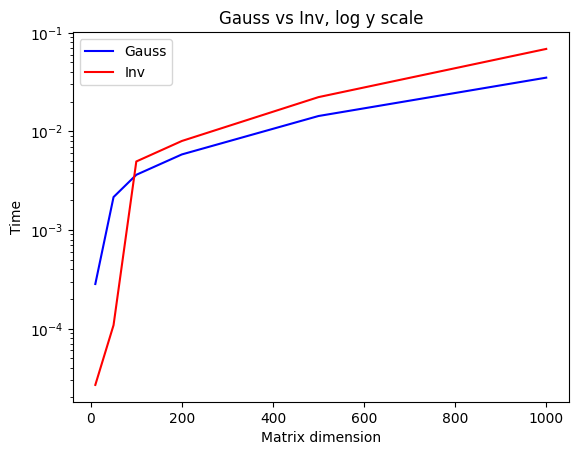

In [3]:
gauss_times = []
inv_times = []
dimensions = [10, 50, 100, 200, 500, 1000]
m = 10
for dim in dimensions:
    n = dim
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    res_gauss = %timeit -o Gauss(A, B)
    gauss_times.append(res_gauss.best)
    res_inv = %timeit -o Inv(A, B)
    inv_times.append(res_inv.best)

plt.semilogy(dimensions, gauss_times, color='blue', label='Gauss')
plt.semilogy(dimensions, inv_times, color='red', label='Inv')
plt.title('Gauss vs Inv, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

3.71 ms ± 317 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.9 ms ± 40.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.77 ms ± 46.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.16 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.4 ms ± 71.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.71 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.12 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.66 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.1 ms ± 834 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.04 ms ± 283 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
21.5 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
14.5 ms ± 3.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
32.2 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
24.3 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


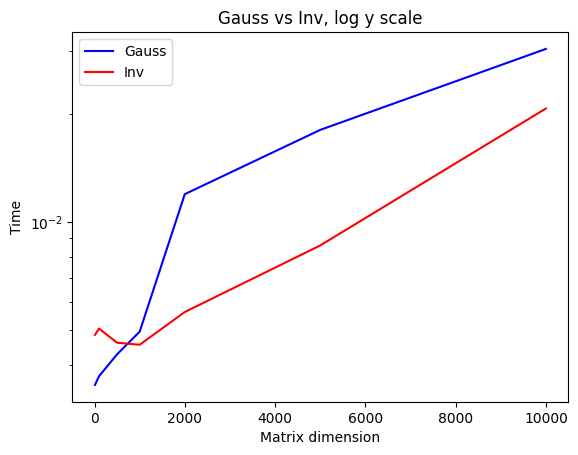

In [4]:
gauss_times = []
inv_times = []
dimensions = [10, 100, 500, 1000, 2000, 5000, 10000]
n = 100
for dim in dimensions:
    m = dim
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    res_gauss = %timeit -o Gauss(A, B)
    gauss_times.append(res_gauss.best)
    res_inv = %timeit -o Inv(A, B)
    inv_times.append(res_inv.best)

plt.semilogy(dimensions, gauss_times, color='blue', label='Gauss')
plt.semilogy(dimensions, inv_times, color='red', label='Inv')
plt.title('Gauss vs Inv, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Таким образом, мы видим, что в первом эксперименте (маленькое $m$ и растущее $n$) асимптотически быстрее работает обычный Гаусс. Во втором случае лучше работает поиск обратной (маленькое $n$ и растущее $m$).

Давайте оценим количество операций, которые требуются для решения с помощью Гаусса. У нас есть матрица размера $n \times (n + m)$, приводим её к УСВ, нам требуется каждую из $n$ строчек повычитать с нужным коэффициентом из нижних (на деления можно забить, так как они дают примерно $n(n+m)$, квадрат. Тогда у нас будет сумма по $i$ от $0$ до $n-1$ слагаемых $(n+m - i)(n - i - 1) = n ^ 2 - ni - n  + mn - mi - m - in + i^2 + i$. В итоге нас интересуют только кубические штуки, поэтому на линейный злдесь можно забить. Просуммируем это по $i$ от $0$ до $n-1$. Получим $n^3 - n^2(n -1) + mn^2 - mn(n-1)/2 + (n-1)n(2n-1)/6$. То есть это примерно $n^3/3 + mn^2/2$. Для поиска обратной нужно примерно $n^3$ операций, потом для умножения на B нужно $mn^2$ операций примерно. Тогда заметим, что при маленьких m Гаусс даёт $n^3/3$, а поиск обратной $n^3$, то есть действительно Гаусс быстрее. При маленьких n Гаусс даёт $m/2$ на константу, обратный даёт $m$ на константу. То есть по идее тоже Гаусс должен быть лучше, странно. Будем считать, что такая оптимизация в библиотеке...Ну или просто зависит от компа.

Спасибо, удачи и хорошего дня :)